In [1]:
import pybamm
import numpy as np
import matplotlib.pyplot as plt

Bingham-Papanastasiou model
$$\underline{\underline{\tau}}=\left(\mu_B+\frac{\tau_y}{|\dot{\gamma}|}[1-exp(-m|\dot{\gamma}|)]\right)\underline{\underline{\dot{\gamma}}}$$

Where $\underline{\underline{\tau}}$ is the shear stress tensor [Pa], $\mu_B$ is the Bingham viscosity [$Pa\cdot s$], $\tau_y$ is the yield stress [$Pa$], $\dot{\gamma}$ is the shear strain [$1/s$] and $m$ is the parameter which describes the exponential growth of stress [$t$]

This model assume 1D so the equation has been simplified to: $$\tau=\mu_B\cdot\dot\gamma+\tau_y[1-exp(-m\dot\gamma)]$$

Text(0.5, -0.15, 'Figure 1: Shear stress versus shear rate for a simple shear for one-dimensional analogue of an ideal Bingham fluid and modified Bingham-Papanastasiou fluid')

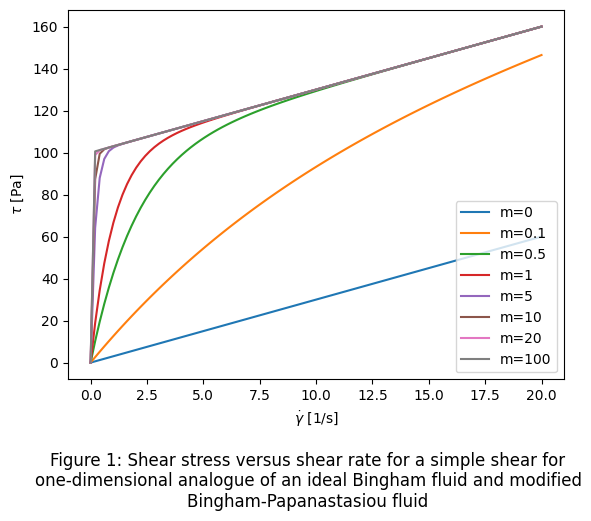

In [2]:
model = pybamm.BaseModel("Bingham-Papanastasiou model")

# define parameters
mu_B = pybamm.Parameter("Bingham viscosity [Pas]")
tau_y = pybamm.Parameter("Yield stress [Pa]")
gamma = pybamm.Parameter("Shear strain [s-1]")
m = pybamm.Parameter("Exponent parameter [t]")

# define variable
#h = pybamm.Variable("Coating thickness [m]")


# governing equations
model.variables["Shear stress [Pa]"] = mu_B*gamma + tau_y*(1-np.exp(-m*gamma))

#Add parameters
param = pybamm.ParameterValues(
    {
        "Exponent parameter [t]": "[input]",
        "Shear strain [s-1]": "[input]",
        "Yield stress [Pa]": 100,
        "Bingham viscosity [Pas]": 3,
    }
)
values = np.linspace(0, 20, 100)
shear_stress = []
m_values = [0,0.1,0.5,1,5,10,20,100]

#Loop over each m value and plot
for j in m_values:
    param["Exponent parameter [t]"] = j

    #Plots the solution to the model over a range of shear strain values for the given m value
    for i in values:
        sim = pybamm.Simulation(model, parameter_values=param, solver=pybamm.DummySolver())
        sol = sim.solve([0, 1], inputs={"Shear strain [s-1]":i})
        shear_stress.append(sol["Shear stress [Pa]"].entries[0])
    
    plt.plot(values, shear_stress, label = "m={}".format(j))
    shear_stress = []

#Figure labels
plt.legend()
plt.xlabel(r"$\dot\gamma$ [1/s]")
plt.ylabel(r"$\tau$ [Pa]")

#Figure caption
txt="Figure 1: Shear stress versus shear rate for a simple shear for one-dimensional analogue of an ideal Bingham fluid and modified Bingham-Papanastasiou fluid"
plt.figtext(0.5, -0.15, txt, wrap=True, horizontalalignment='center', fontsize=12)

Tape thickness vs web velocity for power-law fluid using: $$\delta=\frac{-\left[(-A_0h+A_1)^{\chi+1}-(A_1)^{\chi+1}\right]}{v_0\cdot A_0\cdot \psi \cdot \chi \cdot (\chi+1)}+A_2 h$$

Where $\chi=\frac 1n + 1$, $\psi = \frac{-1}{A_0\cdot k^{\frac 1n}}$, $A_0$ and $A_1$ are integration constants, $h$ is the doctor blade height [mm], $k$ is the consistency of fluid [$Pa\cdot s^n$], $n$ is the power-law index, $v_0$ is the substrate speed [mm/s].